In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [ ]:
# Read your dataset
train_data = pd.read_csv('amazon.csv')
train_data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
train_data.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [ ]:
train_data.shape

(1465, 16)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
train_data = train_data[['user_id','product_id', 'rating', 'rating_count', 'category', 'product_name', 'img_link', 'about_product']]
train_data.head(3)

,user_id,product_id,rating,rating_count,category,product_name,img_link,about_product
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...


In [ ]:
#Basic operations
train_data['about_product']

,about_product
0,High Compatibility : Compatible With iPhone 12...
1,"Compatible with all Type C enabled devices, be..."
2,【 Fast Charger& Data Sync】-With built-in safet...
3,The boAt Deuce USB 300 2 in 1 cable is compati...
4,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...
1460,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,"230 Volts, 400 watts, 1 Year"
1462,International design and styling|Two heat sett...
1463,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [ ]:
train_data.shape

(1465, 8)

In [ ]:
train_data.isnull().sum()

,0
user_id,0
product_id,0
rating,0
rating_count,2
category,0
product_name,0
img_link,0
about_product,0


Just two null Values

In [ ]:
# Fill missing values in 'Product Reviews Count' with a default value (e.g., 0)
train_data.loc[:, 'rating_count'] = train_data['rating_count'].fillna(0)

In [ ]:
train_data.isnull().sum()

,0
user_id,0
product_id,0
rating,0
rating_count,0
category,0
product_name,0
img_link,0
about_product,0


In [ ]:
train_data.duplicated().sum()

20

In [ ]:
train_data_cleaned = train_data.drop_duplicates(subset=['user_id', 'product_id'])
train_data_cleaned.head(5)

,user_id,product_id,rating,rating_count,category,product_name,img_link,about_product
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2,"94,363",Computers&Accessories|Accessories&Peripherals|...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2,"16,905",Computers&Accessories|Accessories&Peripherals|...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [ ]:
train_data_cleaned.shape

(1361, 8)

In [ ]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'user_id': 'ID',
    'product_id': 'ProdID',
    'rating': 'Rating',
    'rating_count': 'ReviewCount',
    'category': 'Category',
    'product_name': 'Name',
    'img_link': 'ImageURL',
    'about_product': 'Description'
}


# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [ ]:
train_data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Name', 'ImageURL',
       'Description'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_id = LabelEncoder()
le_prod = LabelEncoder()
train_data['ID'] = le_id.fit_transform(train_data['ID'])
train_data['ProdID'] = le_prod.fit_transform(train_data['ProdID'])

In [ ]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description
0,623,346,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,88,848,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,849,819,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...
3,254,643,4.2,"94,363",Computers&Accessories|Accessories&Peripherals|...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,17,588,4.2,"16,905",Computers&Accessories|Accessories&Peripherals|...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...,...,...,...,...,...
1460,1050,673,4,"1,090",Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,425,201,4.1,"4,118",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230 Volts, 400 watts, 1 Year"
1462,865,27,3.6,468,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,International design and styling|Two heat sett...
1463,300,61,4,"8,031","Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [ ]:
train_data.duplicated().sum()

20

In [ ]:
#EDA (Exploratory Data Analysis)
num_user = train_data['ID'].nunique()
num_product = train_data['ProdID'].nunique()
num_product_review = train_data['Rating'].nunique()
print(f"Number of unique users: {num_user}")
print(f"Number of unique products: {num_product}")
print(f"Number of product reviews: {num_product_review}")

Number of unique users: 1194
Number of unique products: 1351
Number of product reviews: 28


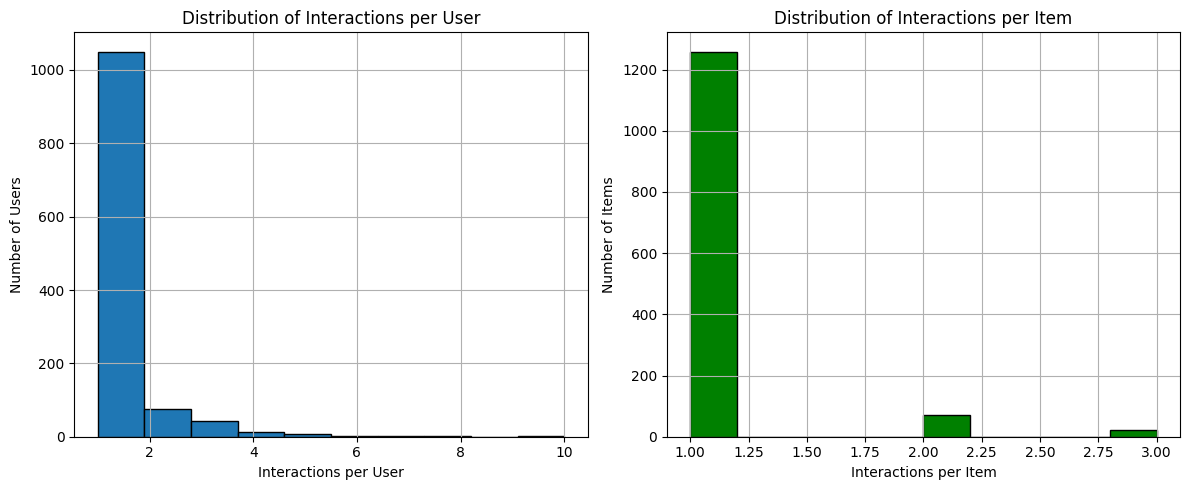

In [ ]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()


<Axes: xlabel='Rating'>

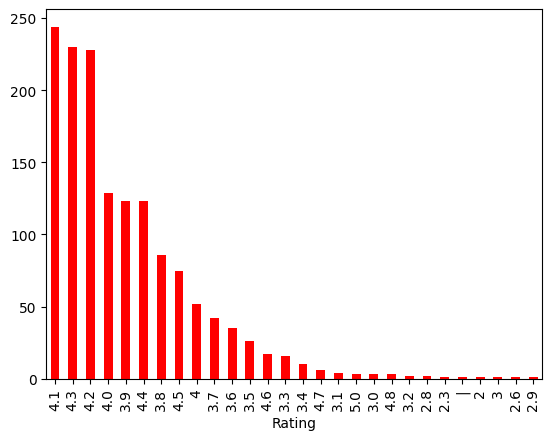

In [ ]:
# most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')

In [ ]:
#Data Cleaning and Tags Creations
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [ ]:
# Replace '|' with ',' in the 'Category' column for all records
train_data['Category'] = train_data['Category'].str.replace('|', ',')

train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description
0,623,346,4.2,"24,269","Computers&Accessories,Accessories&Peripherals,...",Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,"high, compatibility, compatible, iphone, 12, 1..."
1,88,848,4.0,"43,994","Computers&Accessories,Accessories&Peripherals,...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"compatible, type, c, enabled, devices, android..."
2,849,819,3.9,"7,928","Computers&Accessories,Accessories&Peripherals,...",Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,"fast, charger, data, built, safety, proctectio..."
3,254,643,4.2,"94,363","Computers&Accessories,Accessories&Peripherals,...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,"boat, deuce, usb, 300, 2, 1, cable, compatible..."
4,17,588,4.2,"16,905","Computers&Accessories,Accessories&Peripherals,...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,"charge, sync, cable, comes, charging, data, sy..."
...,...,...,...,...,...,...,...,...
1460,1050,673,4,"1,090","Home&Kitchen,Kitchen&HomeAppliances,WaterPurif...",Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,"supreme, quality, 90, gram, 3, layer, thik, pp..."
1461,425,201,4.1,"4,118","Home&Kitchen,Kitchen&HomeAppliances,SmallKitch...",Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230, volts, 400, watts, 1, year"
1462,865,27,3.6,468,"Home&Kitchen,Heating,Cooling&AirQuality,RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,"international, design, heat, settings, 1000, w..."
1463,300,61,4,"8,031","Home&Kitchen,Heating,Cooling&AirQuality,Fans,E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,"fan, sweep, area, 230, mm, noise, level, 40, 4..."


In [ ]:
columns_to_extract_tags = ['Description','Category']
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)

# Convert the 'Rating' column to numeric, forcing errors to NaN
train_data['Rating'] = pd.to_numeric(train_data['Rating'], errors='coerce')

In [ ]:
print(train_data.columns)

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Name', 'ImageURL',
       'Description', 'Tags'],
      dtype='object')


In [ ]:
train_data.to_csv('cleaned_data.csv', index=False)

## Rating base system for the first view

In [ ]:
#Rating Base Recommendations System



average_ratings = train_data.groupby(['Name','ReviewCount','ImageURL'])['Rating'].mean().reset_index()

In [ ]:
average_ratings.sort_values(by='Rating', ascending=False)

,Name,ReviewCount,ImageURL,Rating
86,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,https://m.media-amazon.com/images/I/31+Rg6Z46d...,5.0
1125,Syncwire LTG to USB Cable for Fast Charging Co...,5,https://m.media-amazon.com/images/I/317OoQfs1g...,5.0
940,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",0,https://m.media-amazon.com/images/I/31-q0xhaTA...,5.0
1123,Swiffer Instant Electric Water Heater Faucet T...,"53,803",https://m.media-amazon.com/images/I/41+t2HWvwF...,4.8
804,"Oratech Coffee Frother electric, milk frother ...",28,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
...,...,...,...,...
995,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,87,https://m.media-amazon.com/images/I/41lnTFZGz9...,2.8
463,Green Tales Heat Seal Mini Food Sealer-Impulse...,24,https://m.media-amazon.com/images/W/WEBP_40237...,2.6
845,"Personal Size Blender, Portable Blender, Batte...",13,https://m.media-amazon.com/images/I/417TQs3uro...,2.3
596,Khaitan ORFin Fan heater for Home and kitchen-...,2,https://m.media-amazon.com/images/W/WEBP_40237...,2.0


In [ ]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)
rating_base_recommendation = top_rated_items.head(15) ## modify this number
rating_base_recommendation

,Name,ReviewCount,ImageURL,Rating
86,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,https://m.media-amazon.com/images/I/31+Rg6Z46d...,5.0
1125,Syncwire LTG to USB Cable for Fast Charging Co...,5,https://m.media-amazon.com/images/I/317OoQfs1g...,5.0
940,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",0,https://m.media-amazon.com/images/I/31-q0xhaTA...,5.0
1123,Swiffer Instant Electric Water Heater Faucet T...,"53,803",https://m.media-amazon.com/images/I/41+t2HWvwF...,4.8
804,"Oratech Coffee Frother electric, milk frother ...",28,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
552,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...","3,964",https://m.media-amazon.com/images/W/WEBP_40237...,4.8
1089,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"5,935",https://m.media-amazon.com/images/I/51uVckL1jR...,4.7
1104,Spigen EZ Fit Tempered Glass Screen Protector ...,"7,779",https://m.media-amazon.com/images/I/51EiPNlJDg...,4.7
262,Campfire Spring Chef Prolix Instant Portable W...,"2,591",https://m.media-amazon.com/images/W/WEBP_40237...,4.7
742,Multifunctional 2 in 1 Electric Egg Boiling St...,"2,300",https://m.media-amazon.com/images/W/WEBP_40237...,4.7


##Content Based Recommendation System

In [ ]:
#Content Base Recommendation system (User Preferences or Items similarities)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [ ]:
cosine_similarities_content

array([[1.        , 0.10678067, 0.16953615, ..., 0.03894132, 0.03560271,
        0.00412965],
       [0.10678067, 1.        , 0.12512873, ..., 0.        , 0.01280272,
        0.02512871],
       [0.16953615, 0.12512873, 1.        , ..., 0.02223202, 0.01872446,
        0.        ],
       ...,
       [0.03894132, 0.        , 0.02223202, ..., 1.        , 0.13745822,
        0.01724771],
       [0.03560271, 0.01280272, 0.01872446, ..., 0.13745822, 1.        ,
        0.04982415],
       [0.00412965, 0.02512871, 0.        , ..., 0.01724771, 0.04982415,
        1.        ]])

In [ ]:
train_data['Name'][0]

'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'

In [ ]:
item_name = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
item_index = train_data[train_data['Name']==item_name].index[0]

In [ ]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))
sorted(similar_items, key=lambda x:x[1], reverse=True)

[(0, 1.0000000000000002),
 (369, 1.0000000000000002),
 (614, 1.0000000000000002),
 (220, 0.9743700765703204),
 (42, 0.9118444671174549),
 (89, 0.9118444671174549),
 (80, 0.7840329293448934),
 (166, 0.7295208348561664),
 (106, 0.7224338291028007),
 (208, 0.5231897387538839),
 (261, 0.5056257173976522),
 (324, 0.4487040932573851),
 (117, 0.42630146605049046),
 (331, 0.4200433560300485),
 (104, 0.3967081122463603),
 (186, 0.38365362615039683),
 (183, 0.37858150682009845),
 (156, 0.36951143787222523),
 (78, 0.33250279172128905),
 (1000, 0.33250279172128905),
 (259, 0.3303577030187613),
 (99, 0.32588586805506425),
 (191, 0.32097086440365274),
 (272, 0.31731219846685915),
 (182, 0.30088739995944824),
 (4, 0.29423092429859526),
 (14, 0.29423092429859526),
 (393, 0.29423092429859526),
 (456, 0.29423092429859526),
 (632, 0.29423092429859526),
 (692, 0.29423092429859526),
 (538, 0.2723553501551285),
 (237, 0.2522915664445528),
 (213, 0.2509153457076175),
 (398, 0.24394253247764378),
 (238, 0.243

In [ ]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [ ]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Rating']]

,Name,ReviewCount,Rating
369,Wayona Nylon Braided USB to Lightning Fast Cha...,"24,270",4.2
614,Wayona Nylon Braided USB to Lightning Fast Cha...,"24,269",4.2
220,Wayona Nylon Braided Usb Syncing And Charging ...,"24,269",4.2
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,"24,269",4.2
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,"24,269",4.2
80,Wayona Usb Nylon Braided Data Sync And Chargin...,"24,269",4.2
166,Wayona Nylon Braided Lightning USB Data Sync &...,"13,120",4.2
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,"24,269",4.2
208,MYVN LTG to USB for Fast Charging & Data Sync ...,"2,249",3.7


In [ ]:
#Function To Recommend Products for Content Base

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'ImageURL', 'Rating']]

    return recommended_items_details

In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=10)

content_based_rec

,Name,ReviewCount,ImageURL,Rating
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,"4,26,972",https://m.media-amazon.com/images/I/41nPYaWA+M...,4.4
25,Tizum High Speed HDMI Cable with Ethernet | Su...,"12,153",https://m.media-amazon.com/images/I/41da4tk7N+...,4.2
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","4,26,973",https://m.media-amazon.com/images/I/41bCxnHksn...,4.4
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","4,26,973",https://m.media-amazon.com/images/I/41eJqkFjCR...,4.4
218,"Amazon Basics HDMI Coupler,Black","18,872",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
267,AmazonBasics High-Speed Braided HDMI Cable - 3...,"35,877",https://m.media-amazon.com/images/I/41SxrTzMiv...,4.4
204,BlueRigger High Speed HDMI Cable with Ethernet...,"44,054",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
301,TIZUM High Speed HDMI Cable Aura -Gold Plated-...,"12,153",https://m.media-amazon.com/images/I/51aZN040TH...,4.2
227,Rts™ High Speed 3D Full HD 1080p Support (10 M...,910,https://m.media-amazon.com/images/I/41+H-BiHBl...,4.2
291,AmazonBasics 10.2 Gbps High-Speed 4K HDMI Cabl...,"1,029",https://m.media-amazon.com/images/W/WEBP_40237...,4.5


In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,ImageURL,Rating
112,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"1,035",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
135,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,"1,376",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
283,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"1,376",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
122,VW 80 cm (32 inches) Playwall Frameless Series...,592,https://m.media-amazon.com/images/I/41P2TNMG-h...,4.3
323,TCL 108 cm (43 inches) 4K Ultra HD Certified A...,"2,951",https://m.media-amazon.com/images/I/51UuhCYmBn...,4.2
87,Samsung 108 cm (43 inches) Crystal 4K Series U...,"7,109",https://m.media-amazon.com/images/I/41RVzq6GiI...,4.3
61,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"7,109",https://m.media-amazon.com/images/I/41Tz1YnJko...,4.3
192,Samsung 138 cm (55 inches) Crystal 4K Neo Seri...,"7,109",https://m.media-amazon.com/images/W/WEBP_40237...,4.3


## Collaborative Filtering (User Item Similarity)

In [ ]:
train_data = train_data.drop_duplicates()


In [ ]:
filtered_data = train_data[train_data['ProdID'] == 346]
train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description,Tags
0,623,346,4.2,"24,269","Computers&Accessories,Accessories&Peripherals,...",Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,"high, compatibility, compatible, iphone, 12, 1...","high, compatibility, compatible, iphone, 12, 1..."
1,88,848,4.0,"43,994","Computers&Accessories,Accessories&Peripherals,...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"compatible, type, c, enabled, devices, android...","compatible, type, c, enabled, devices, android..."
2,849,819,3.9,"7,928","Computers&Accessories,Accessories&Peripherals,...",Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,"fast, charger, data, built, safety, proctectio...","fast, charger, data, built, safety, proctectio..."
3,254,643,4.2,"94,363","Computers&Accessories,Accessories&Peripherals,...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,"boat, deuce, usb, 300, 2, 1, cable, compatible...","boat, deuce, usb, 300, 2, 1, cable, compatible..."
4,17,588,4.2,"16,905","Computers&Accessories,Accessories&Peripherals,...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,"charge, sync, cable, comes, charging, data, sy...","charge, sync, cable, comes, charging, data, sy..."
...,...,...,...,...,...,...,...,...,...
1460,1050,673,4.0,"1,090","Home&Kitchen,Kitchen&HomeAppliances,WaterPurif...",Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,"supreme, quality, 90, gram, 3, layer, thik, pp...","supreme, quality, 90, gram, 3, layer, thik, pp..."
1461,425,201,4.1,"4,118","Home&Kitchen,Kitchen&HomeAppliances,SmallKitch...",Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230, volts, 400, watts, 1, year","230, volts, 400, watts, 1, year, Home&Kitchen,..."
1462,865,27,3.6,468,"Home&Kitchen,Heating,Cooling&AirQuality,RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,"international, design, heat, settings, 1000, w...","international, design, heat, settings, 1000, w..."
1463,300,61,4.0,"8,031","Home&Kitchen,Heating,Cooling&AirQuality,Fans,E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,"fan, sweep, area, 230, mm, noise, level, 40, 4...","fan, sweep, area, 230, mm, noise, level, 40, 4..."


In [ ]:
# Create the User-Item matrix
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)
user_item_matrix

ProdID,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)
user_item_matrix

ProdID,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
target_user_id = 2
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [ ]:
user_similarities = user_similarity[target_user_index]
user_similarities
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [ ]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','ImageURL','Rating']]

In [ ]:
recommended_items_details.head(10)

,Name,ReviewCount,ImageURL,Rating
46,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,"8,131",https://m.media-amazon.com/images/I/31+NwZ8gb1...,4.1
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,"1,79,692",https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
189,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
239,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,"12,091",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
588,SanDisk Cruzer Blade 32GB USB Flash Drive,"2,53,105",https://m.media-amazon.com/images/I/310mw9KTJv...,4.3
721,Duracell Plus AAA Rechargeable Batteries (750 ...,"27,201",https://m.media-amazon.com/images/I/418YrbHVLC...,4.3
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...","31,534",https://m.media-amazon.com/images/I/31iFF1Kbkp...,4.3
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...","54,405",https://m.media-amazon.com/images/I/31CtVvtFt+...,4.5
874,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,"22,375",https://m.media-amazon.com/images/W/WEBP_40237...,4.1


In [ ]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended  'ImageURL', 'Rating']]

    return recommended_items_details.head(10)


# Example usage
target_user_id = 2
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 2:


,Name,ReviewCount,ImageURL,Rating
46,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,"8,131",https://m.media-amazon.com/images/I/31+NwZ8gb1...,4.1
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,"1,79,692",https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
189,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
239,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,"12,091",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
588,SanDisk Cruzer Blade 32GB USB Flash Drive,"2,53,105",https://m.media-amazon.com/images/I/310mw9KTJv...,4.3
721,Duracell Plus AAA Rechargeable Batteries (750 ...,"27,201",https://m.media-amazon.com/images/I/418YrbHVLC...,4.3
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...","31,534",https://m.media-amazon.com/images/I/31iFF1Kbkp...,4.3
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...","54,405",https://m.media-amazon.com/images/I/31CtVvtFt+...,4.5
874,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,"22,375",https://m.media-amazon.com/images/W/WEBP_40237...,4.1


##Hybrid Recommendation

In [ ]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()


    return hybrid_rec.head(10)

# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 12 # Change this to the user_id you want recommendations for
item_name = "Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster (White)"
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 12 and Item 'Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster (White)':


,Name,ReviewCount,ImageURL,Rating
1114,"Philips HL7756/00 Mixer Grinder, 750W, 3 Jars ...","26,543",https://m.media-amazon.com/images/I/31eyLyEftO...,4.1
1047,Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...,"41,349",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
1195,Morphy Richards Icon Superb 750W Mixer Grinder...,"4,664",https://m.media-amazon.com/images/I/417XNLkkFR...,4.2
1130,Prestige Iris 750 Watt Mixer Grinder with 3 St...,"43,070",https://m.media-amazon.com/images/W/WEBP_40237...,3.9
1068,"Butterfly Jet Elite Mixer Grinder, 750W, 4 Jar...","25,340",https://m.media-amazon.com/images/I/41vK2c5b-l...,3.9
1087,Prestige IRIS Plus 750 watt mixer grinder,"14,062",https://m.media-amazon.com/images/W/WEBP_40237...,3.8
1413,"Bajaj Rex DLX 750 W 4 Jars Mixer Grinder, Whit...",777,https://m.media-amazon.com/images/W/WEBP_40237...,4.0
1428,"Sujata Dynamix, Mixer Grinder, 900 Watts, 3 Ja...","2,751",https://m.media-amazon.com/images/I/415634DtKf...,4.6
1045,Lifelong LLMG23 Power Pro 500-Watt Mixer Grind...,"44,050",https://m.media-amazon.com/images/I/413sK6yat-...,3.8
1381,"Sujata Dynamix DX Mixer Grinder, 900W, 3 Jars ...","6,550",https://m.media-amazon.com/images/I/41cZE9HcRU...,4.6
